In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [5]:
#Loading dataframe from the last Notebook
df = pd.read_csv('dataSets.csv', index_col=0)
cons_annee = pd.read_csv('moy_annee.csv')
df.head()

,consommation_kWh,mois,annee,CO2_kg,prix_EUR
0,9847,1,2010,1572.184358,984.7
1,10063,2,2010,1480.399633,1006.3
2,9904,3,2010,1394.176853,990.4
3,9930,4,2010,1500.440278,993.0
4,10094,5,2010,1620.859860,1009.4


In [6]:
df.shape

(168, 5)

In [7]:
df.describe()

,consommation_kWh,mois,annee,CO2_kg,prix_EUR
count,168.000000,168.000000,168.00000,168.000000,168.000000
mean,12499.059524,6.500000,2016.50000,2096.042950,2254.536103
std,1458.665745,3.462373,4.04318,366.467727,840.044989
min,9847.000000,1.000000,2010.00000,1394.176853,984.700000
25%,11238.750000,3.750000,2013.00000,1788.875259,1510.384615
50%,12490.500000,6.500000,2016.50000,2070.309585,2187.384615
75%,13704.250000,9.250000,2020.00000,2399.491269,2951.684615
max,15084.000000,12.000000,2023.00000,2780.586966,3771.000000


In [8]:
df.columns

Index(['consommation_kWh', 'mois', 'annee', 'CO2_kg', 'prix_EUR'], dtype='object')

### Modèles de prédiction et tests de performance

In [9]:
copie = df.copy()
copie['date'] = copie['annee'].astype(str) + '-' + copie['mois'].astype(str).str.zfill(2)
copie['date'] = pd.to_datetime(copie['date'])
copie.set_index('date', inplace=True)
copie.index = copie.index.strftime('%Y-%m')
copie.head()

,consommation_kWh,mois,annee,CO2_kg,prix_EUR
date,,,,,
2010-01,9847,1,2010,1572.184358,984.7
2010-02,10063,2,2010,1480.399633,1006.3
2010-03,9904,3,2010,1394.176853,990.4
2010-04,9930,4,2010,1500.440278,993.0
2010-05,10094,5,2010,1620.859860,1009.4


In [10]:
copie.drop(['mois', 'annee'], inplace=True, axis=1)
copie.head()

,consommation_kWh,CO2_kg,prix_EUR
date,,,
2010-01,9847,1572.184358,984.7
2010-02,10063,1480.399633,1006.3
2010-03,9904,1394.176853,990.4
2010-04,9930,1500.440278,993.0
2010-05,10094,1620.859860,1009.4


In [11]:
copie.dtypes

consommation_kWh      int64
CO2_kg              float64
prix_EUR            float64
dtype: object

In [12]:
copie.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
       '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype='object', name='date', length=168)

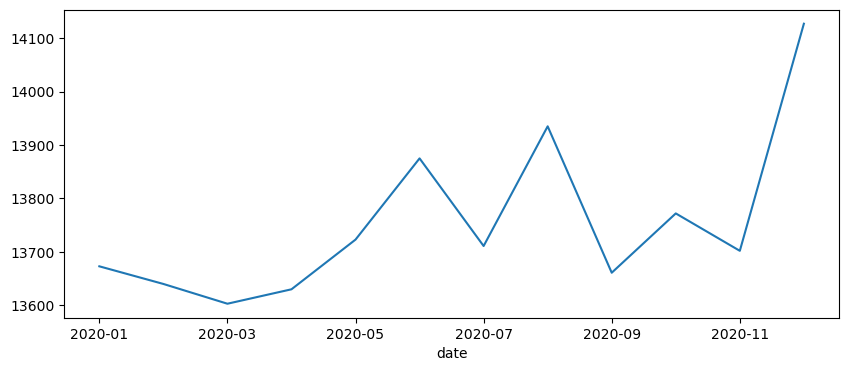

In [13]:
plt.figure(figsize=(10,4))
copie['2020-01':'2020-12']['consommation_kWh'].plot()
plt.show()

In [14]:
copie['valeurCible'] = copie.shift(-1)['consommation_kWh']
copie = copie.ffill()
copie

,consommation_kWh,CO2_kg,prix_EUR,valeurCible
date,,,,
2010-01,9847,1572.184358,984.70,10063.0
2010-02,10063,1480.399633,1006.30,9904.0
2010-03,9904,1394.176853,990.40,9930.0
2010-04,9930,1500.440278,993.00,10094.0
2010-05,10094,1620.859860,1009.40,10308.0
...,...,...,...,...
2023-08,14885,2764.484602,3721.25,14996.0
2023-09,14996,2636.440347,3749.00,14909.0
2023-10,14909,2717.749686,3727.25,15084.0


In [15]:
d_entrainement = copie[:160]
d_validation = copie[160:]

col_entrainement = copie.columns[:3]

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

mymodels = [LinearRegression(), 
          Ridge(), 
          Lasso(),]

In [17]:
lr_params = {'fit_intercept': [True, False], 'copy_X': [True]}

ridge_params = {'alpha':[1,0.1,0.01,0.001], 'max_iter':[1000], 'tol':[0.001]}

lasso_params = {'alpha':[1,0.1,0.01,0.001], 'max_iter':[1000], 'tol':[0.001]}

# l'algo s'arretera si la modifications des coefficients sra inferieur à 0.001

liste_params = [lr_params, ridge_params, lasso_params]

In [18]:
for i in range(3) :
    grid = GridSearchCV(mymodels[i], liste_params[i])
    grid.fit(d_entrainement[col_entrainement], d_entrainement['valeurCible'])

c:\Users\PC de MEDUSA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.282e+05, tolerance: 1.610e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC de MEDUSA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+06, tolerance: 3.050e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC de MEDUSA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

In [19]:
grid.best_score_

0.6940880857196607

In [20]:
grid.best_estimator_

Lasso(alpha=1, tol=0.001)

In [21]:
grid.best_params_

{'alpha': 1, 'max_iter': 1000, 'tol': 0.001}

In [22]:
mymodels[2].fit(d_entrainement[col_entrainement], d_entrainement['valeurCible'])
preds = mymodels[2].predict(d_validation[col_entrainement])

preds = pd.Series(preds, index=d_validation.index)
preds

date
2023-05    14947.038006
2023-06    14796.943983
2023-07    14854.167375
2023-08    14968.966863
2023-09    15099.201471
2023-10    15002.988293
2023-11    15149.289488
2023-12    14963.193035
dtype: float64

In [30]:
resultats = pd.concat([d_validation['valeurCible'], preds], axis=1)
resultats.columns = ['actuel', 'prediction']
resultats['diff'] = (resultats['prediction'] - resultats['actuel']).abs()
resultats

,actuel,prediction,diff
date,,,
2023-05,14633.0,14947.038006,314.038006
2023-06,14705.0,14796.943983,91.943983
2023-07,14885.0,14854.167375,30.832625
2023-08,14996.0,14968.966863,27.033137
2023-09,14909.0,15099.201471,190.201471
2023-10,15084.0,15002.988293,81.011707
2023-11,14884.0,15149.289488,265.289488
2023-12,14884.0,14963.193035,79.193035


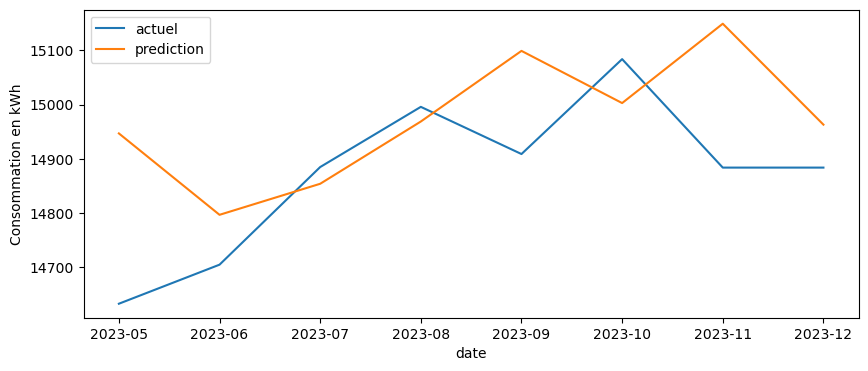

In [32]:
plt.figure(figsize=(10,4))
resultats['actuel'].plot(label='actuel')
resultats['prediction'].plot(label='prediction')
plt.ylabel("Consommation en kWh")
plt.legend()
plt.show()

In [25]:
resultats['prediction'].to_json('prediction.json')

In [26]:
file_name = "model.pkl"

with open(file_name, 'wb') as file:
    pickle.dump(mymodels[2], file)